# **Problem Statement**

##Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

##Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

##Data Description


The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

Data Dictionary:
* Booking_ID: the unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    1. Not Selected – No meal plan selected
    2. Meal Plan 1 – Breakfast
    3. Meal Plan 2 – Half board (breakfast and one other meal)
    4. Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.


# **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/PGPDSA/INNHotelsGroup.csv')
#returns first 5 rows
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


# **Data Overview**

###1. Structure of Data

In [ ]:
df.shape

(36275, 19)

###2. Type of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

###3. Missing values treatment

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


###4. Data Duplicates

In [ ]:
df.duplicated().sum()

0

###5. Statistical Summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


##Insights

* The majority of bookings are made for 2 adults, which is evident from the mean (1.84) and the median (2.00) of the no_of_adults column. This suggests that most guests are couples or pairs.
* The average stay includes slightly less than one weekend night (mean of 0.81) and about two weekday nights (mean of 2.20). This suggests that many guests might be staying for a long weekend or a short weekday trip.
* The average lead_time is around 85 days, showing that guests generally book well in advance, which can be beneficial for managing hotel occupancy and revenue strategies.
* The avg_price_per_room shows a mean of approximately 103.42, indicating the average price point for rooms. The large range (from 0 to 540) suggests varied pricing options, likely based on room types or seasons.
* The arrival_year and arrival_month suggest most data is from 2018, and bookings are spread across months with a peak around October. This indicates potential seasonality, with likely higher demand during summer months.

# **Exploratory Data Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Distribution of {feature}')

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    ax.set_title(f'Distribution of {feature}')
    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot of {predictor} vs {target}')
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Distribution and Boxplots of {predictor} with respect to {target}', fontsize=16)


    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate Analysis

#### Observations on no_of_adults



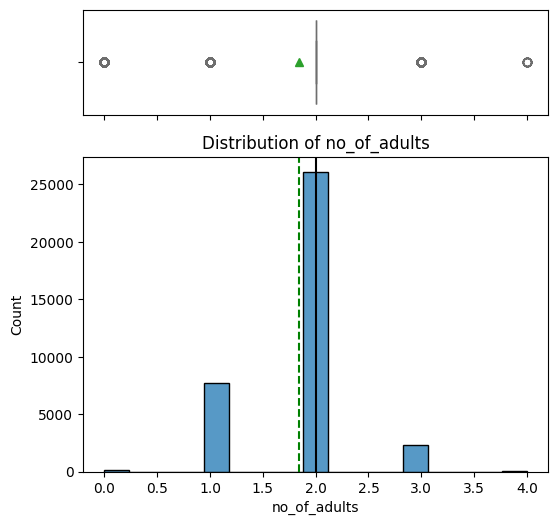

In [ ]:
histogram_boxplot(df, "no_of_adults",figsize=(6,6))


#### Observations on no_of_children


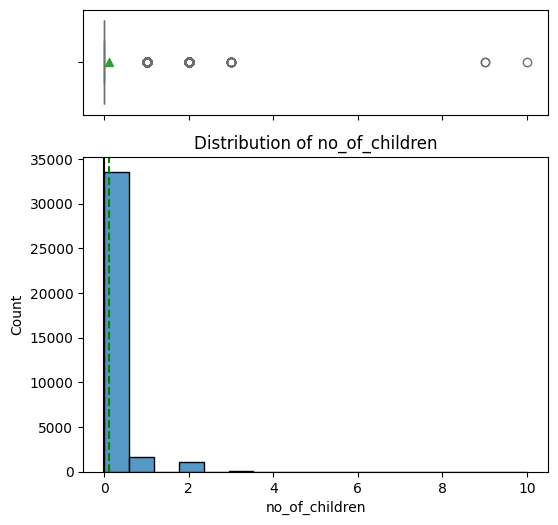

In [ ]:
histogram_boxplot(df, "no_of_children",figsize=(6,6))


#### Observations on no_of_weekend_nights


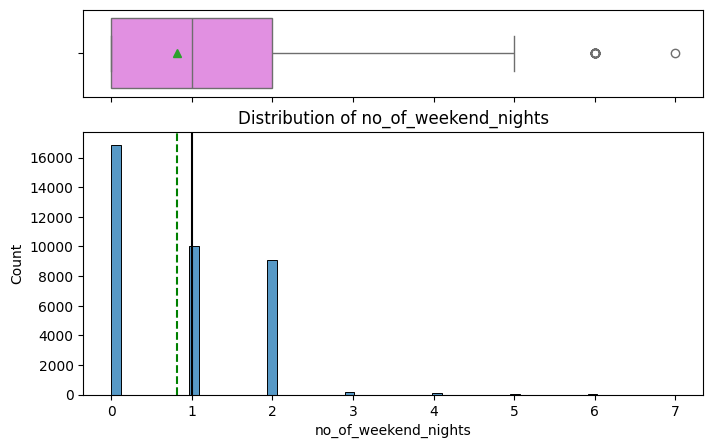

In [ ]:
histogram_boxplot(df, "no_of_weekend_nights",figsize=(8,5))


#### Observations on no_of_week_nights


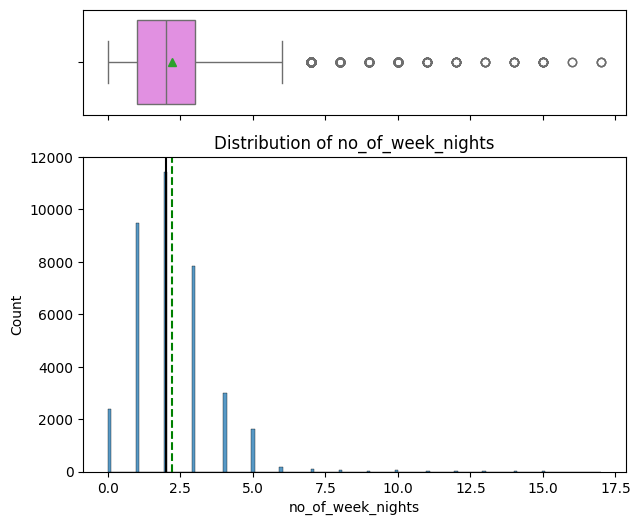

In [ ]:
histogram_boxplot(df, "no_of_week_nights",figsize=(7,6))


#### Observations on type_of_meal_plan


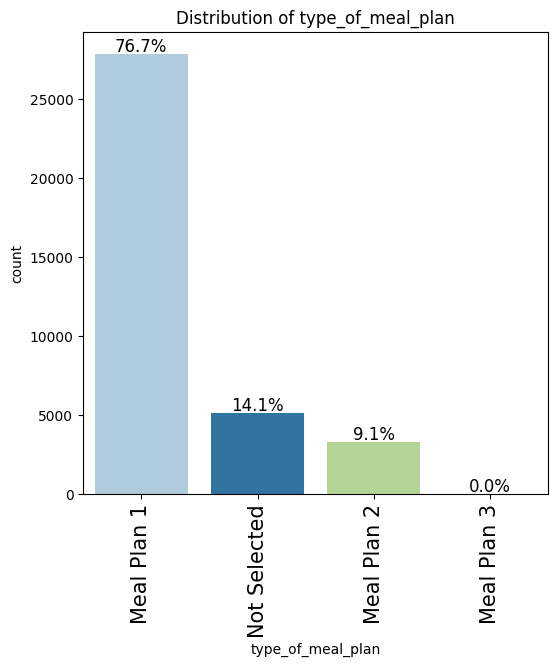

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

#### Observations on required_car_parking_space


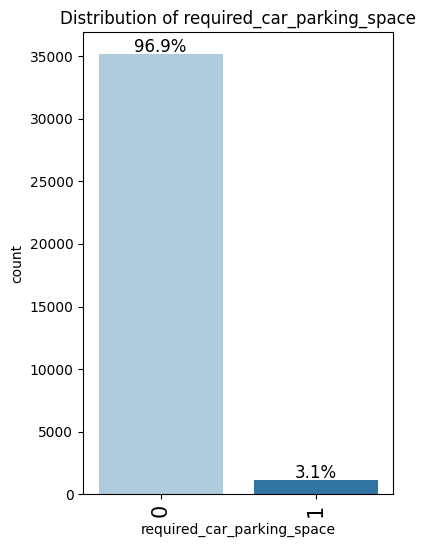

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)

#### Observations on room_type_reserved


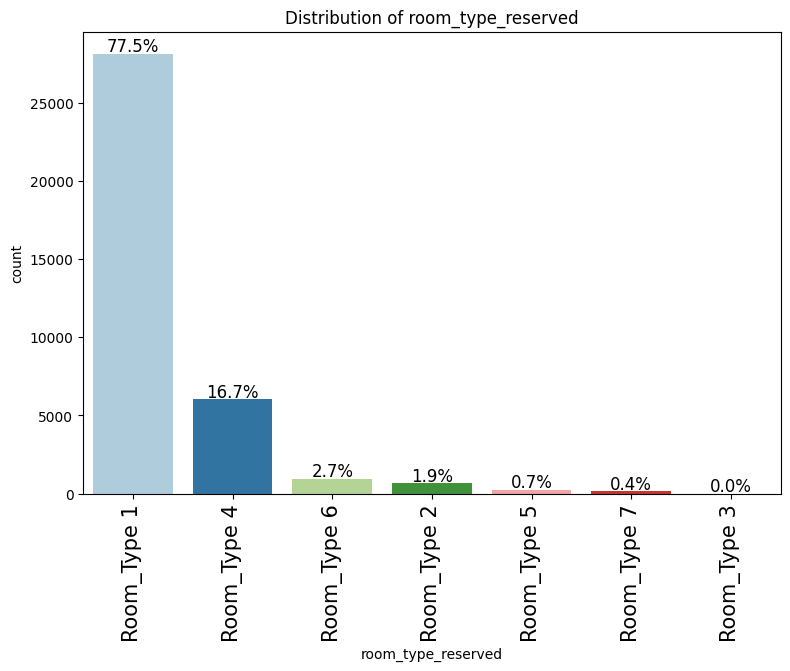

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

#### Observations on lead_time


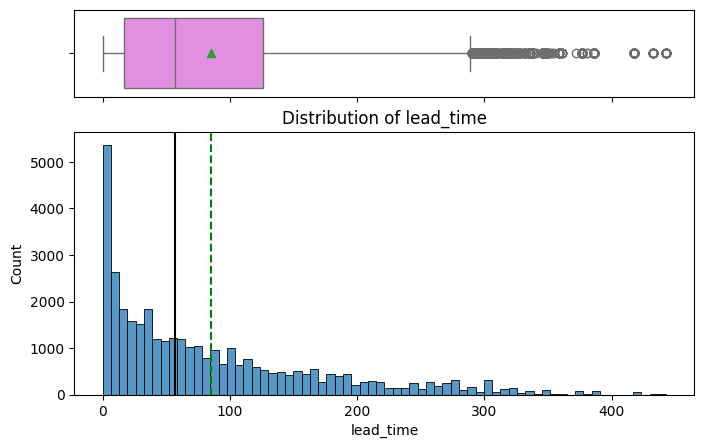

In [ ]:
histogram_boxplot(df, "lead_time",figsize=(8,5))

#### Observations on arrival_year


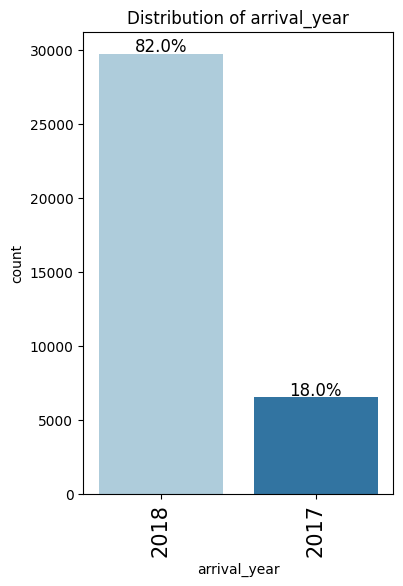

In [ ]:
labeled_barplot(df, "arrival_year", perc=True)

####**Q1: What are the busiest months in the hotel?**

#### Observations on arrival_month


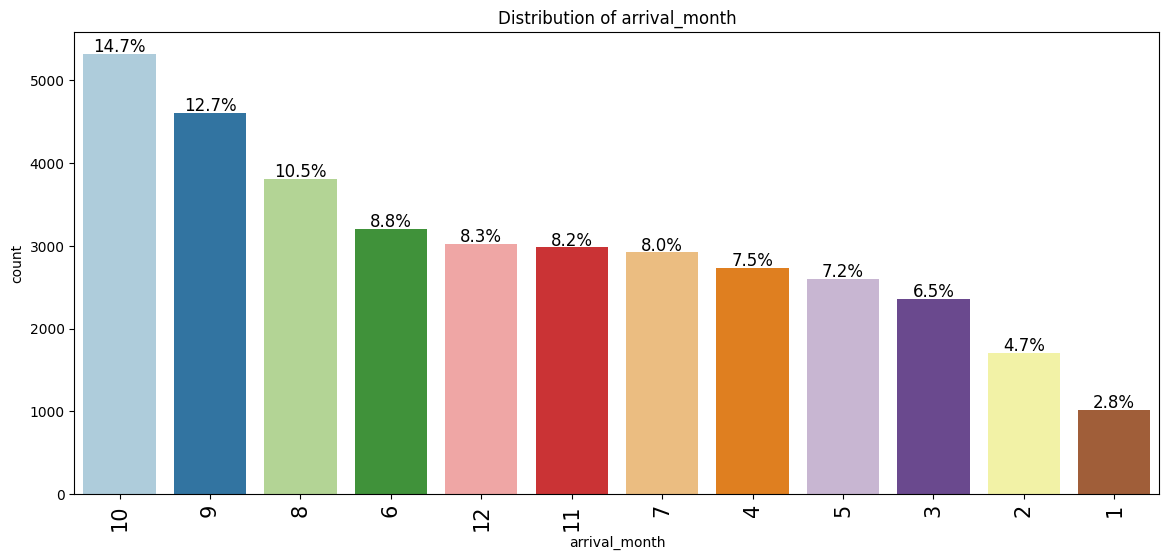

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)

####**Q2: Which market segment do most of the guests come from?**

#### Observations on market_segment_type


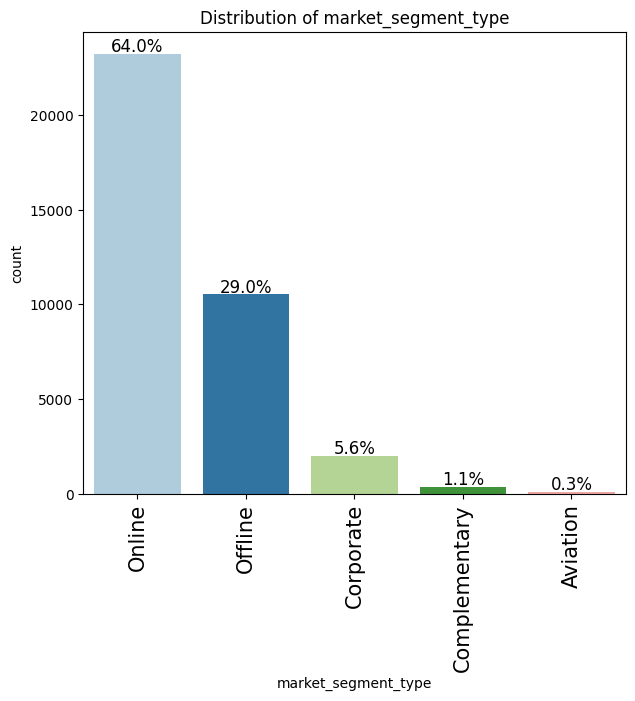

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

#### Observations on repeated_guest


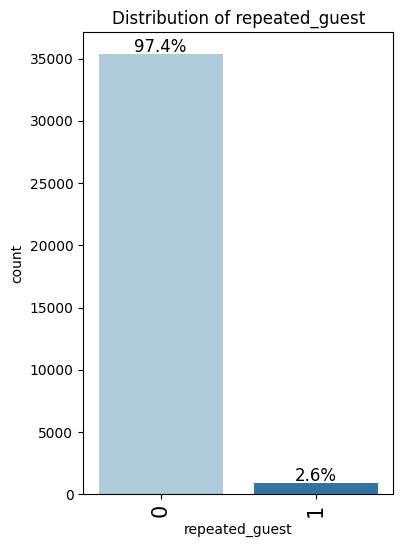

In [ ]:
labeled_barplot(df, "repeated_guest", perc=True)

#### Observations on no_of_previous_cancellations


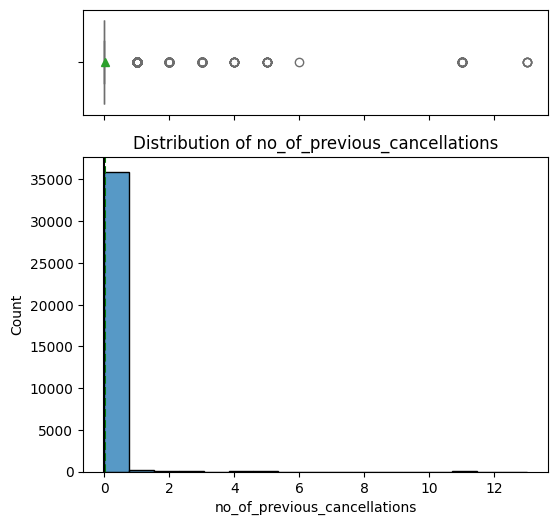

In [ ]:
histogram_boxplot(df, "no_of_previous_cancellations",figsize=(6,6))

#### Observations on no_of_previous_bookings_not_canceled


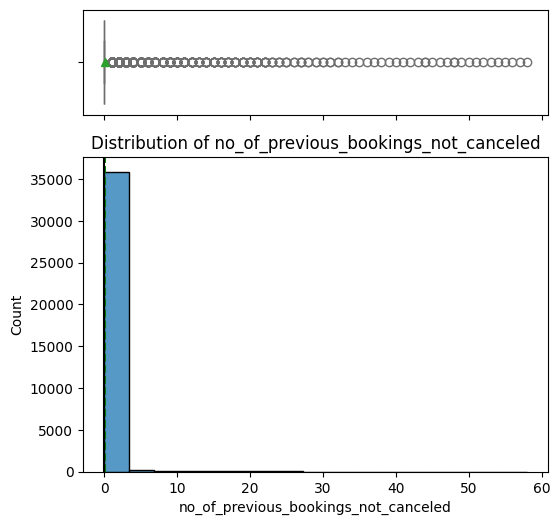

In [ ]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled",figsize=(6,6))

#### Observations on avg_price_per_room


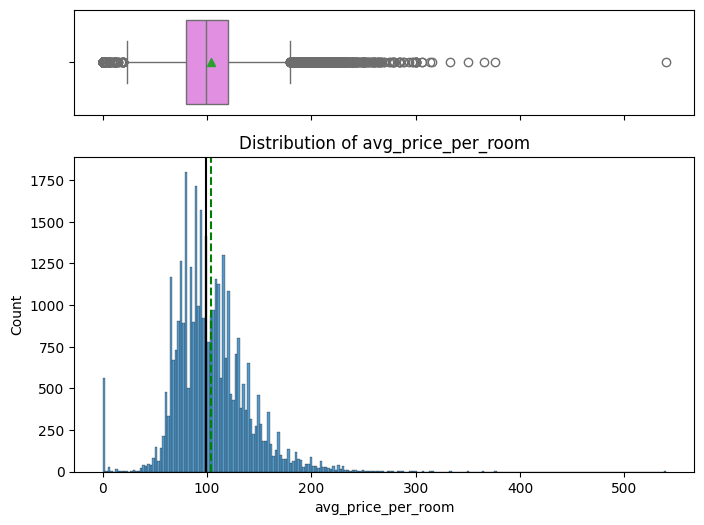

In [ ]:
histogram_boxplot(df, "avg_price_per_room",figsize=(8,6))

#### Observations on no_of_special_requests


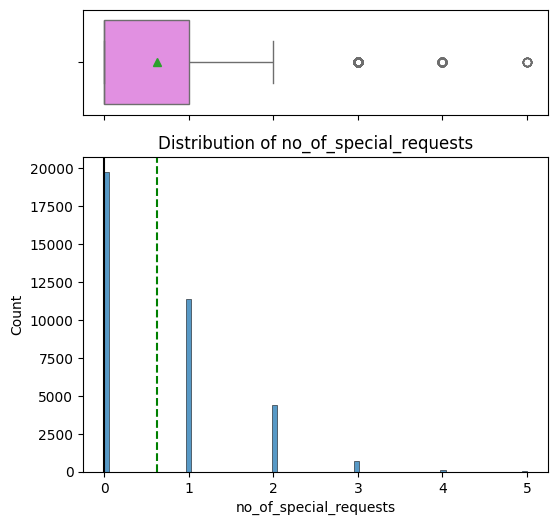

In [ ]:
histogram_boxplot(df, "no_of_special_requests",figsize=(6,6))

#### **Q4: What percentage of bookings are canceled?**

#### Observations on booking_status


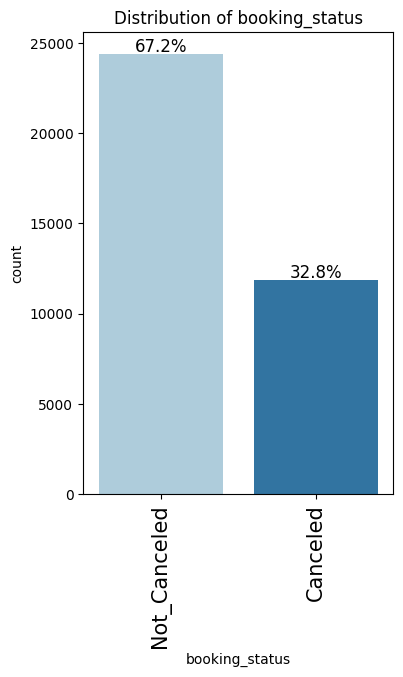

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

####Insights

* Most bookings consist of 2 adults, suggesting that couples are the primary customer segment.
* required_car_parking_space distribution suggests that most guests do not require a parking space, possibly indicating the hotel is in an area with good public transportation options or caters to business travelers who do not drive.
* Less number of cancellations.
* The arrival_month suggest most and bookings are spread across months with a peak around October. This indicates potential seasonality, with likely higher demand during summer months.

###Bivariate Analysis

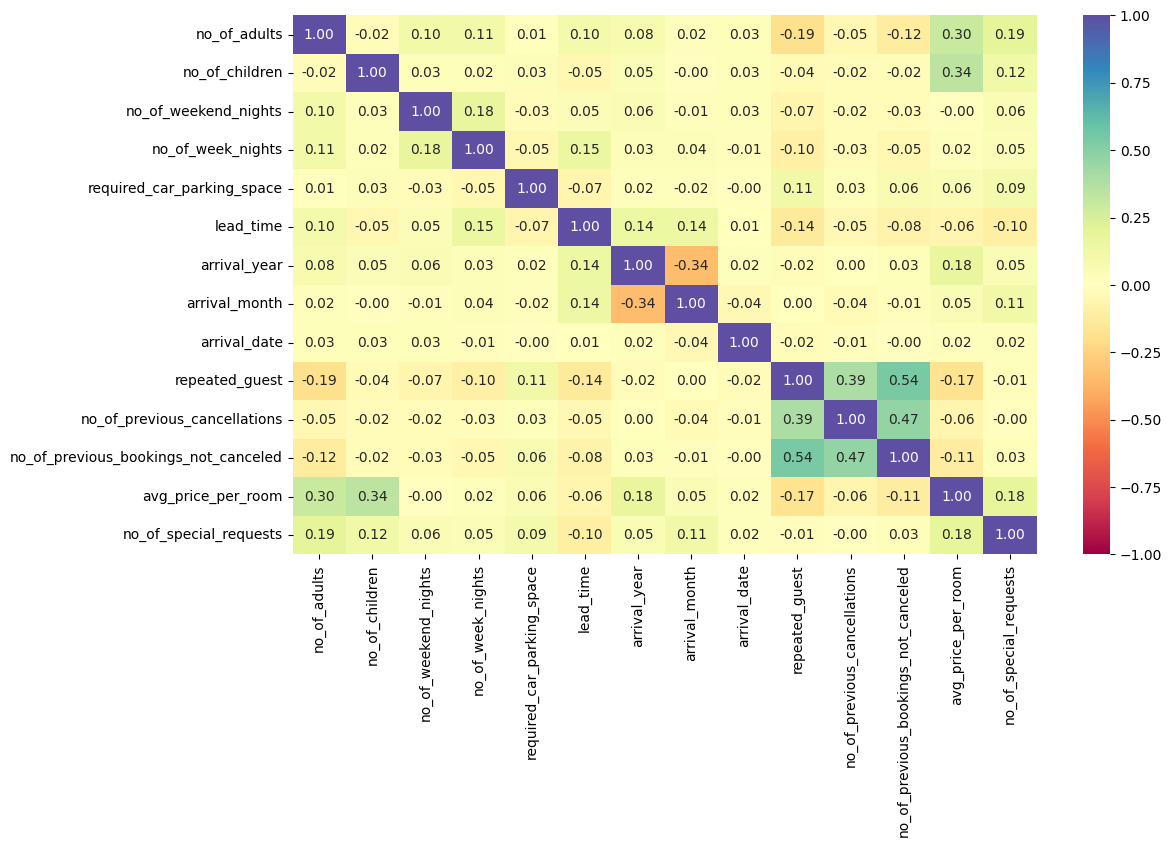

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Insights

* Repeat Guest and No. of Previous Cancellations: A correlation of 0.39 suggests that guests who have previously canceled are moderately more likely to be repeat guests.
* Repeat Guest and No. of Previous Bookings Not Canceled: A correlation of 0.54 indicates a stronger likelihood of repeat bookings from guests who have not canceled before.
* Average Price Per Room and No. of Children: The correlation of 0.34 is quite notable, suggesting that rooms booked with children tend to be priced higher, possibly due to larger room types or additional amenities being booked.

In [ ]:
# plt.figure(figsize=(4,4))
# sns.pairplot(data=df[cols_list], diag_kind="kde")
# # plt.title("Relationship between numerical variables")
# plt.show()

####Cancellations vs. Lead Time

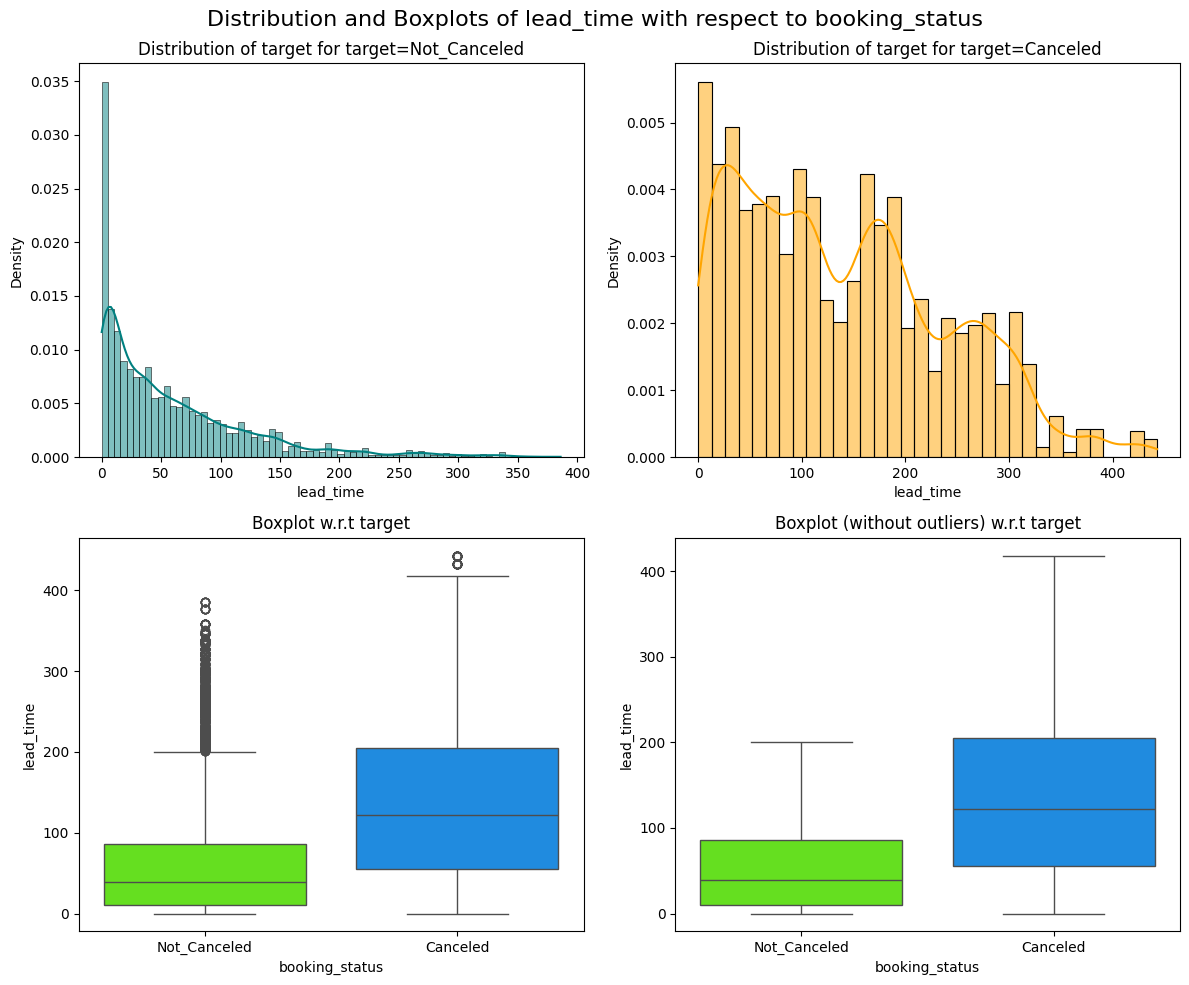

In [ ]:
distribution_plot_wrt_target(df, "lead_time","booking_status")

####Room Type vs. Booking Status

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


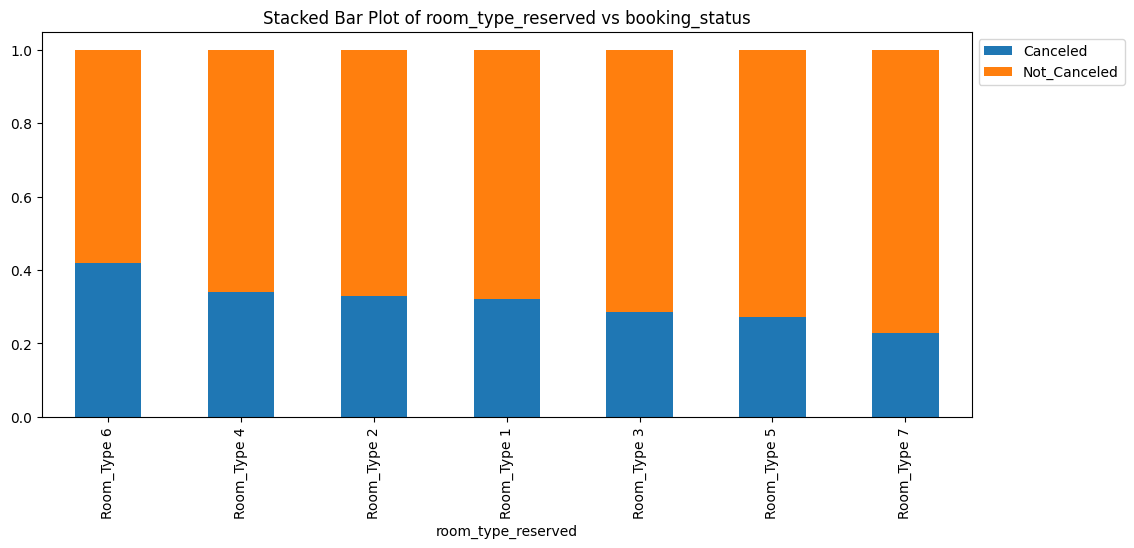

In [ ]:
stacked_barplot(df, "room_type_reserved", "booking_status")

####Market Segment vs. Booking Trends

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


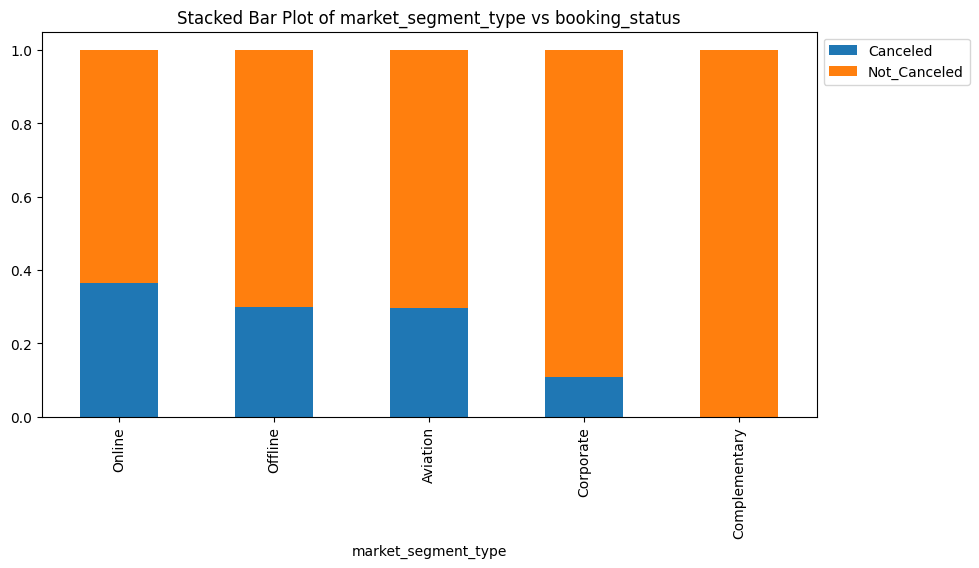

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

####**Q6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

####Special Requests vs. Cancellations

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


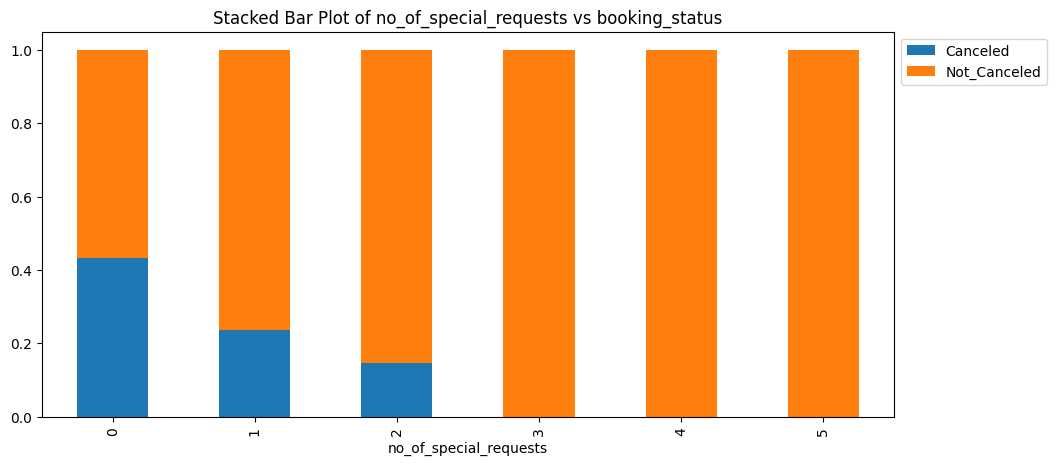

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

####Parking vs. Guest Type

repeated_guest                  0    1    All
required_car_parking_space                   
All                         35345  930  36275
0                           34360  791  35151
1                             985  139   1124
------------------------------------------------------------------------------------------------------------------------


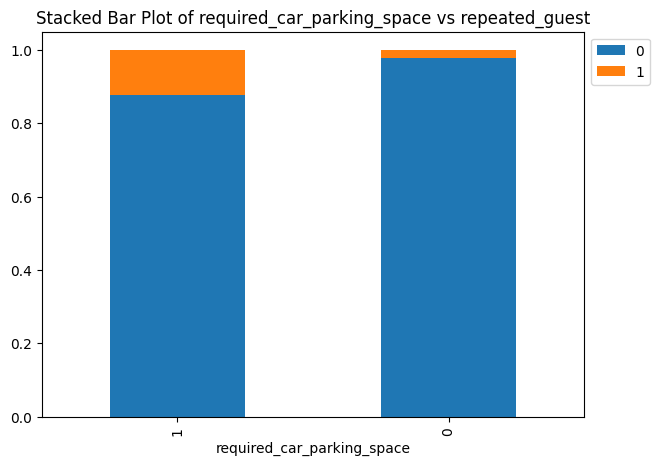

In [ ]:
stacked_barplot(df, "required_car_parking_space", "repeated_guest")

#### **Q3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

#### Average price per room vs Market segment type

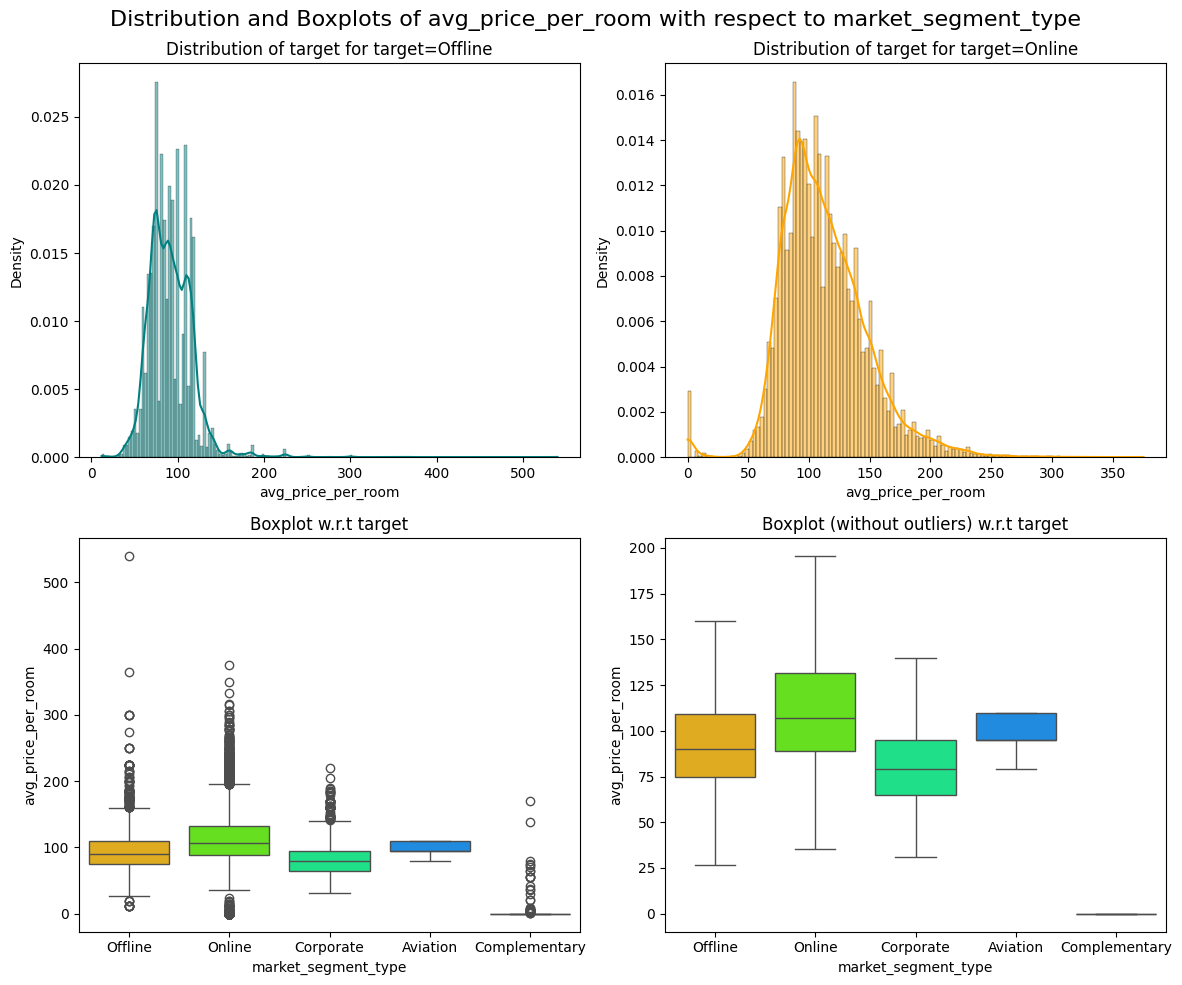

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room","market_segment_type")

####**Q5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

#### Booking status vs repeated guest

repeated_guest      0    1    All
booking_status                   
All             35345  930  36275
Not_Canceled    23476  914  24390
Canceled        11869   16  11885
------------------------------------------------------------------------------------------------------------------------


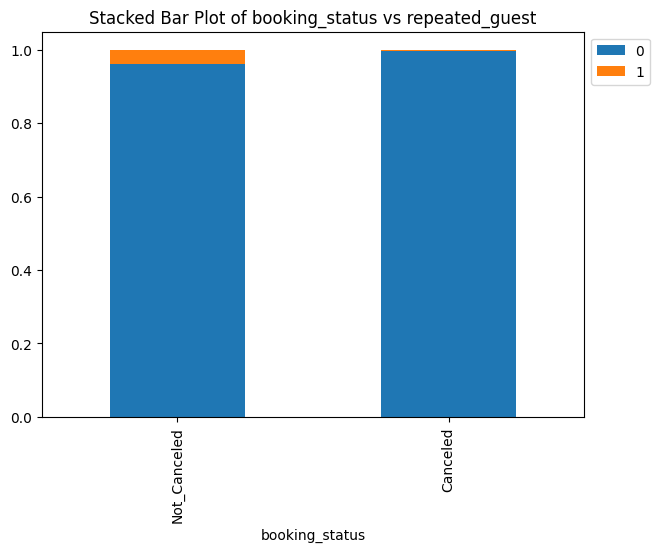

In [ ]:
stacked_barplot(df, "booking_status", "repeated_guest")

###Insights


* Hotel bookings are high from August to October, with a peak in October.
* Customers prefer online bookings based on the distribution of market segment types.
* We observe that 32% of bookings are canceled for various reasons.
* Around 28% of cancellations may be due to special requests.
* Prices are higher for rooms booked online, while offline and corporate bookings have similar room prices.
* Less than 1% of repeat guests cancel their bookings.

# **Data Preprocessing**

### Missing values treatment

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


### Outlier Check

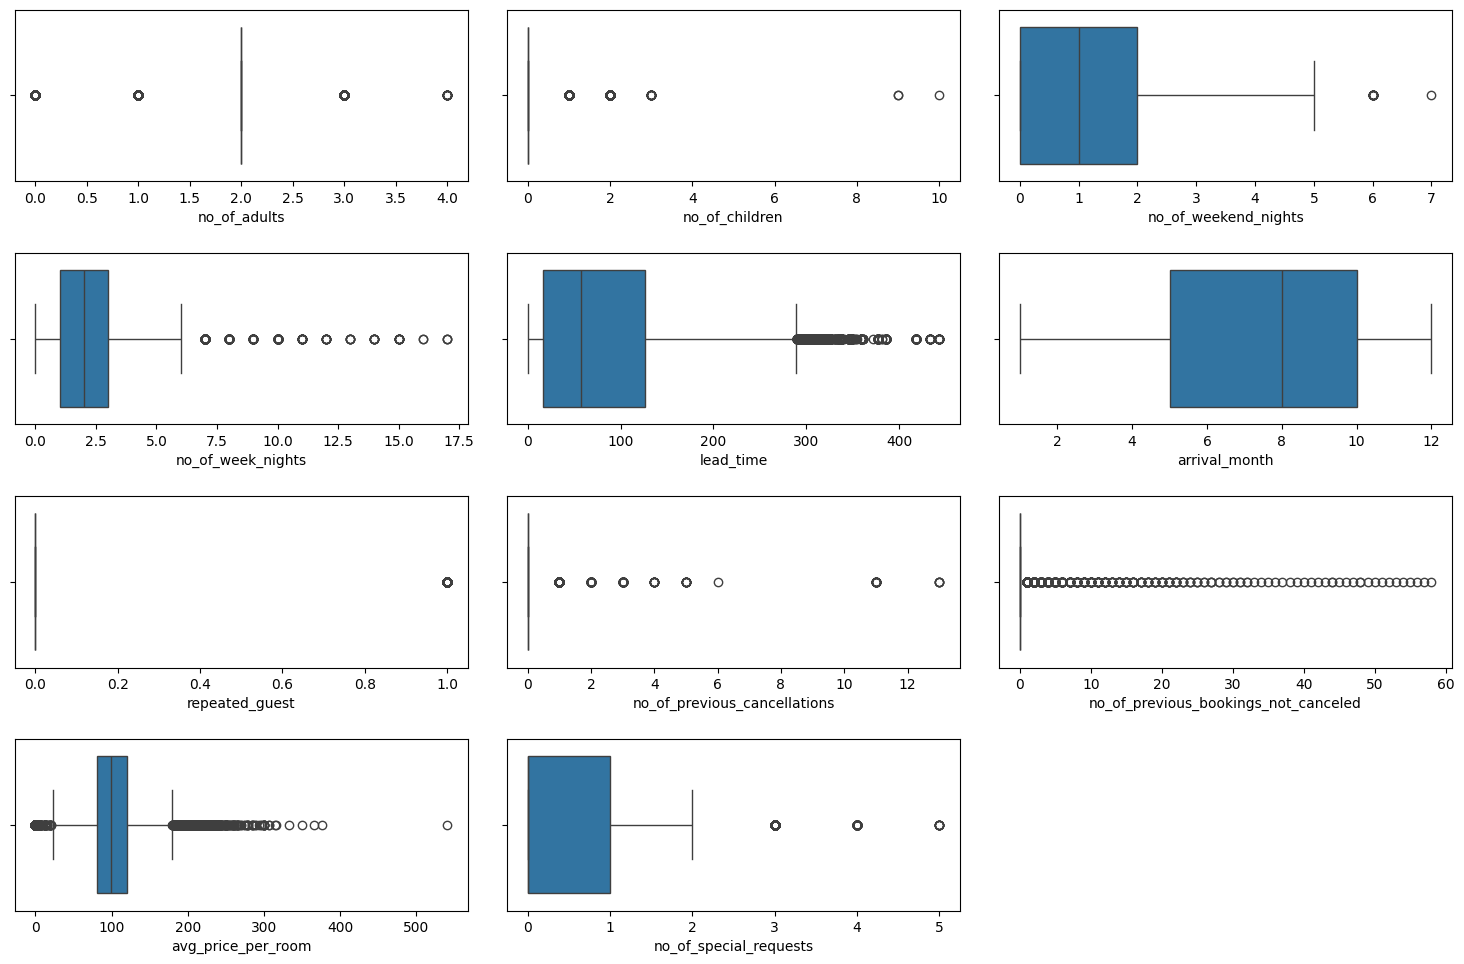

In [ ]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(4)
num_cols.pop(5)
num_cols.pop(6)
plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_month',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

20.749999999999993

In [ ]:
upper_bound

179.55

In [ ]:
outliers = df[(df['avg_price_per_room'] < lower_bound) | (df['avg_price_per_room'] > upper_bound)]


In [ ]:
outliers

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
60,INN00061,2,2,0,1,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0,0,258.00000,1,Not_Canceled
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
114,INN00115,2,2,2,2,Meal Plan 1,0,Room_Type 2,116,2018,6,26,Online,0,0,0,184.24000,1,Canceled
127,INN00128,2,2,0,2,Meal Plan 1,0,Room_Type 6,110,2018,10,14,Online,0,0,0,190.80000,0,Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,INN36222,2,2,2,4,Meal Plan 1,0,Room_Type 6,62,2018,9,24,Online,0,0,0,207.90000,1,Not_Canceled
36227,INN36228,2,2,0,1,Meal Plan 1,0,Room_Type 6,20,2018,8,6,Online,0,0,0,231.00000,1,Not_Canceled
36250,INN36251,1,0,0,2,Meal Plan 2,0,Room_Type 1,6,2017,12,10,Online,0,0,0,0.00000,0,Not_Canceled
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00000,0,Not_Canceled


The price varies with the seasons, so we can hold off on removing these outliers for the time being.

### Feature Engineering


Removing features from the dataset that have constant values and those that do not positively impact the prediction model.

In [ ]:
data=df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']]

### Data Preparation for modeling - Encoding, Train-test split, Scaling

- Our goal is to predict which bookings will be canceled in advance, helping us develop profitable policies for cancellations and refunds.

- Before building the model, we'll need to encode the categorical features.

- We will split the data into training and testing sets to evaluate the model built on the training data.

In [ ]:
data = pd.get_dummies(data,drop_first=True)

X = data.drop(["booking_status_Not_Canceled"], axis=1)
Y = data["booking_status_Not_Canceled"]


X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.00000,0.00000,1.00000,3.00000,0.00000,200.00000,8.00000,0.00000,0.00000,0.00000,90.95000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,2.00000,0.00000,1.00000,3.00000,0.00000,79.00000,3.00000,0.00000,0.00000,0.00000,90.95000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,2.00000,0.00000,1.00000,4.00000,0.00000,78.00000,4.00000,0.00000,0.00000,0.00000,99.45000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,2.00000,0.00000,2.00000,0.00000,0.00000,61.00000,10.00000,0.00000,0.00000,0.00000,91.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,2.00000,1.00000,0.00000,4.00000,0.00000,201.00000,11.00000,0.00000,0.00000,0.00000,82.28000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25387,2.00000,0.00000,2.00000,2.00000,0.00000,43.00000,12.00000,0.00000,0.00000,0.00000,55.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
25388,1.00000,0.00000,0.00000,2.00000,0.00000,102.00000,10.00000,0.00000,0.00000,0.00000,80.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25389,2.00000,0.00000,0.00000,2.00000,0.00000,5.00000,5.00000,0.00000,0.00000,0.00000,110.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25390,2.00000,0.00000,0.00000,3.00000,0.00000,213.00000,6.00000,0.00000,0.00000,0.00000,130.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
X_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_month', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [ ]:
len(X_test)

10883

# **Model Building**

## Model evaluation metrics

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with Statsmodel)

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train)
X_test_with_intercept = SM.add_constant(X_test)

In [ ]:
X_train_with_intercept

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2.00000,0.00000,1.00000,3.00000,0.00000,200.00000,8.00000,0.00000,0.00000,0.00000,90.95000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,1.00000,2.00000,0.00000,1.00000,3.00000,0.00000,79.00000,3.00000,0.00000,0.00000,0.00000,90.95000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,1.00000,2.00000,0.00000,1.00000,4.00000,0.00000,78.00000,4.00000,0.00000,0.00000,0.00000,99.45000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,1.00000,2.00000,0.00000,2.00000,0.00000,0.00000,61.00000,10.00000,0.00000,0.00000,0.00000,91.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,1.00000,2.00000,1.00000,0.00000,4.00000,0.00000,201.00000,11.00000,0.00000,0.00000,0.00000,82.28000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25387,1.00000,2.00000,0.00000,2.00000,2.00000,0.00000,43.00000,12.00000,0.00000,0.00000,0.00000,55.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
25388,1.00000,1.00000,0.00000,0.00000,2.00000,0.00000,102.00000,10.00000,0.00000,0.00000,0.00000,80.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25389,1.00000,2.00000,0.00000,0.00000,2.00000,0.00000,5.00000,5.00000,0.00000,0.00000,0.00000,110.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25390,1.00000,2.00000,0.00000,0.00000,3.00000,0.00000,213.00000,6.00000,0.00000,0.00000,0.00000,130.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept.astype(float)).fit()
print(LogisticReg.summary())

         Current function value: 0.425663
         Iterations: 35
                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25366
Method:                                    MLE   Df Model:                           25
Date:                         Fri, 09 Aug 2024   Pseudo R-squ.:                  0.3258
Time:                                 19:32:02   Log-Likelihood:                -10808.
converged:                               False   LL-Null:                       -16030.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const               

####Model Performance - Train data

In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.80289,0.88910,0.83043,0.85876


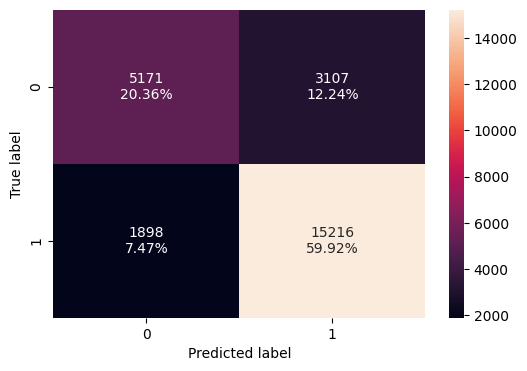

In [ ]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

### Model performance - test data

In [ ]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.80474,0.89720,0.82581,0.86002


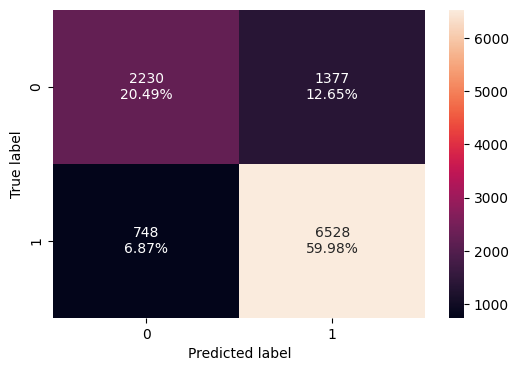

In [ ]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

## KNN Classifier (K = 3)

Scaling the Data

In [ ]:
cont_col=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time','no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests']
other_col=['required_car_parking_space','arrival_month', 'repeated_guest','type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online']

In [ ]:
for_scaling_train=X_train[cont_col]
for_scaling_test=X_test[cont_col]

In [ ]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(for_scaling_train), columns=for_scaling_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(for_scaling_test), columns=for_scaling_test.columns)

In [ ]:
X_train1=pd.concat([X_train_scaled,X_train[other_col]],axis=1)
X_test1=pd.concat([X_test_scaled,X_test[other_col]],axis=1)

In [ ]:
X_train1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,required_car_parking_space,arrival_month,repeated_guest,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.29850,-0.26164,0.21880,0.57188,1.33640,-0.06313,-0.08587,-0.35749,-0.78611,0.00000,8.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.29850,-0.26164,0.21880,0.57188,-0.07477,-0.06313,-0.08587,-0.35749,0.48528,0.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,0.29850,-0.26164,0.21880,1.28792,-0.08644,-0.06313,-0.08587,-0.11509,0.48528,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.29850,-0.26164,1.37121,-1.57623,-0.28470,-0.06313,-0.08587,-0.35606,-0.78611,0.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,0.29850,2.22659,-0.93361,1.28792,1.34806,-0.06313,-0.08587,-0.60473,3.02807,0.00000,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25387,0.29850,-0.26164,1.37121,-0.14416,-0.49463,-0.06313,-0.08587,-1.38269,1.75668,0.00000,12.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
25388,-1.62816,-0.26164,-0.93361,-0.14416,0.19346,-0.06313,-0.08587,-0.66975,-0.78611,0.00000,10.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25389,0.29850,-0.26164,-0.93361,-0.14416,-0.93781,-0.06313,-0.08587,0.18577,0.48528,0.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25390,0.29850,-0.26164,-0.93361,0.57188,1.48801,-0.06313,-0.08587,0.75612,-0.78611,0.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train1, y_train)

KNeighborsClassifier(n_neighbors=3)

####Model Performance - Train data

In [ ]:
knn_perf_train = model_performance_classification(
    knn_model, X_train1, y_train
)
knn_perf_train

,Accuracy,Recall,Precision,F1
0,0.91671,0.94992,0.92818,0.93892


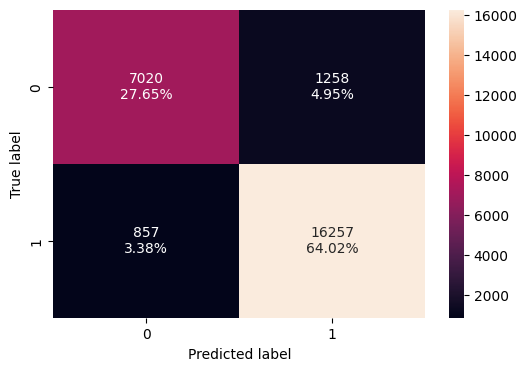

In [ ]:
plot_confusion_matrix(knn_model, X_train1, y_train)

### Model performance - test data

In [ ]:
knn_perf_test = model_performance_classification(
    knn_model, X_test1, y_test
)
knn_perf_test

,Accuracy,Recall,Precision,F1
0,0.85234,0.90104,0.88083,0.89082


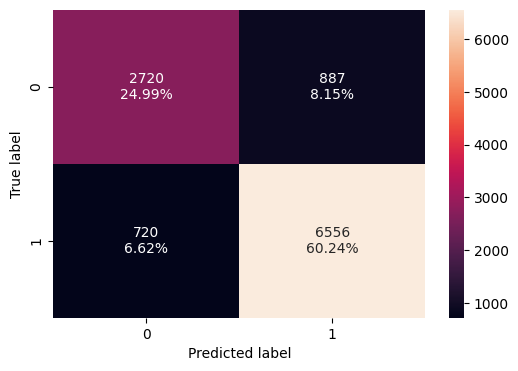

In [ ]:
plot_confusion_matrix(knn_model, X_test1, y_test)

## Naive - Bayes Classifier

In [ ]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

### Model performance - train data

In [ ]:
nb_perf_train = model_performance_classification(
    nb_model, X_train, y_train
)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.40855,0.14029,0.88729,0.24228


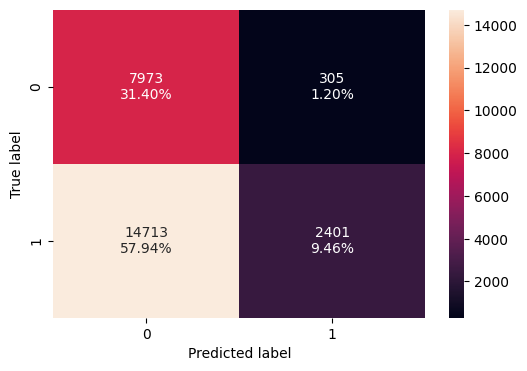

In [ ]:
plot_confusion_matrix(nb_model, X_train, y_train)

### Model performance - test data

In [ ]:
nb_perf_test = model_performance_classification(
    nb_model, X_test, y_test
)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.41459,0.14184,0.89042,0.24469


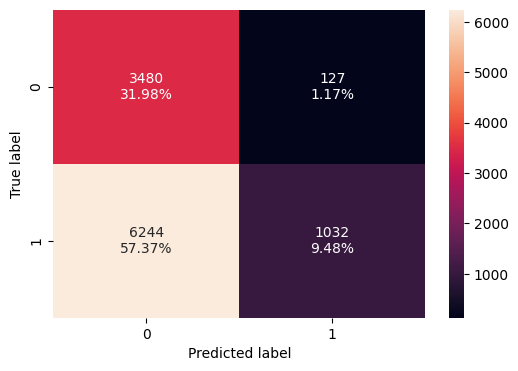

In [ ]:
plot_confusion_matrix(nb_model, X_test, y_test)

## Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model performance - train data

In [ ]:
dt_perf_train = model_performance_classification(
    dt_model, X_train, y_train
)
dt_perf_train

,Accuracy,Recall,Precision,F1
0,0.99374,0.99509,0.99562,0.99535


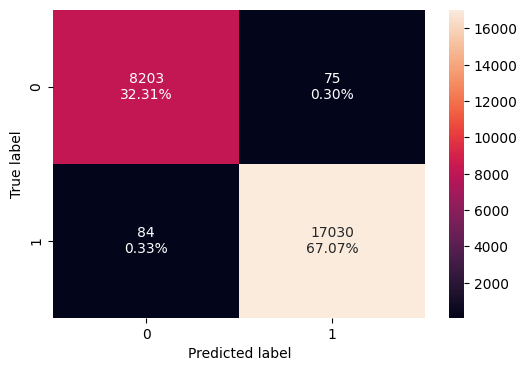

In [ ]:
plot_confusion_matrix(dt_model, X_train, y_train)

### Model performance - test data

In [ ]:
dt_perf_test = model_performance_classification(
    dt_model, X_test, y_test
)
dt_perf_test

,Accuracy,Recall,Precision,F1
0,0.86364,0.89321,0.90189,0.89753


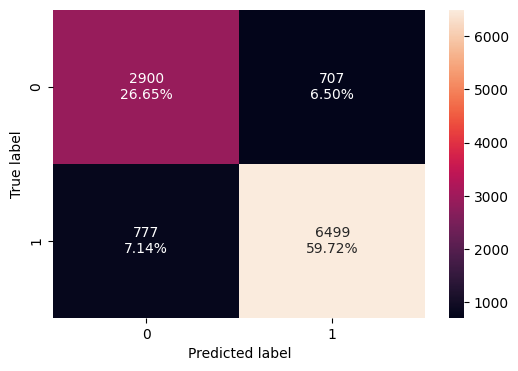

In [ ]:
plot_confusion_matrix(dt_model, X_test, y_test)

# **Model Performance Improvement**

## Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold 	using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_with_intercept)
print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable       VIF
0                                  const 326.53376
1                           no_of_adults   1.34103
2                         no_of_children   2.00531
3                   no_of_weekend_nights   1.06289
4                      no_of_week_nights   1.09128
5             required_car_parking_space   1.03706
6                              lead_time   1.24328
7                          arrival_month   1.04936
8                         repeated_guest   1.76556
9           no_of_previous_cancellations   1.36938
10  no_of_previous_bookings_not_canceled   1.61311
11                    avg_price_per_room   1.92811
12                no_of_special_requests   1.24369
13         type_of_meal_plan_Meal Plan 2   1.19892
14         type_of_meal_plan_Meal Plan 3   1.00600
15        type_of_meal_plan_Not Selected   1.23946
16        room_type_reserved_Room_Type 2   1.09085
17        room_type_reserved_Room_Type 3   1.00484
18 

**Note:** Removing dummy variables of market_segment_type to remove multicollinearity

In [ ]:
cols=["market_segment_type_Complementary","market_segment_type_Corporate"]

In [ ]:
X_train_with_intercept.drop(columns=cols, inplace=True)
X_test_with_intercept.drop(columns=cols, inplace=True)

In [ ]:
calculate_vif(X_train_with_intercept)

,Variable,VIF
0,const,38.14690
1,no_of_adults,1.32534
2,no_of_children,2.00368
3,no_of_weekend_nights,1.05815
4,no_of_week_nights,1.08644
5,required_car_parking_space,1.03699
6,lead_time,1.24154
7,arrival_month,1.04792
8,repeated_guest,1.75775
9,no_of_previous_cancellations,1.36878


### Dealing with high p-value variables

In [ ]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.426183
         Iterations 10
Dropping column room_type_reserved_Room_Type 3 with p-value: 0.6257719482026117
Optimization terminated successfully.
         Current function value: 0.426188
         Iterations 10
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.4368540065144816
Optimization terminated successfully.
         Current function value: 0.426205
         Iterations 9
Dropping column type_of_meal_plan_Meal Plan 2 with p-value: 0.34777192684515545
Optimization terminated successfully.
         Current function value: 0.426222
         Iterations 9
Dropping column type_of_meal_plan_Meal Plan 3 with p-value: 0.32806390350922154
Optimization terminated successfully.
         Current function value: 0.426253
         Iterations 9
Dropping column no_of_children with p-value: 0.06007277921533484
Optimization terminated successfully.
         Current function value: 0.426321
         Iteratio

In [ ]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]
X_train_significant.head(10)

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2.00000,1.00000,3.00000,0.00000,200.00000,8.00000,0.00000,0.00000,90.95000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,1.00000,2.00000,1.00000,3.00000,0.00000,79.00000,3.00000,0.00000,0.00000,90.95000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,1.00000,2.00000,1.00000,4.00000,0.00000,78.00000,4.00000,0.00000,0.00000,99.45000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,1.00000,2.00000,2.00000,0.00000,0.00000,61.00000,10.00000,0.00000,0.00000,91.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,1.00000,2.00000,0.00000,4.00000,0.00000,201.00000,11.00000,0.00000,0.00000,82.28000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
5,1.00000,2.00000,0.00000,2.00000,0.00000,12.00000,2.00000,0.00000,0.00000,171.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
6,1.00000,2.00000,0.00000,1.00000,0.00000,8.00000,2.00000,0.00000,0.00000,85.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
7,1.00000,1.00000,1.00000,1.00000,0.00000,301.00000,7.00000,0.00000,0.00000,90.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
8,1.00000,1.00000,1.00000,2.00000,0.00000,63.00000,5.00000,0.00000,0.00000,130.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,1.00000,2.00000,1.00000,2.00000,0.00000,57.00000,6.00000,0.00000,0.00000,90.67000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


### Training the Logistic Regression model again with only the significant features

In [ ]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.426321
         Iterations 9
                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25373
Method:                                    MLE   Df Model:                           18
Date:                         Fri, 09 Aug 2024   Pseudo R-squ.:                  0.3247
Time:                                 19:37:33   Log-Likelihood:                -10825.
converged:                                True   LL-Null:                       -16030.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
logistic_regtuned_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train
)
logistic_regtuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.80305,0.88886,0.83076,0.85883


### Determining optimal threshold using ROC Curve

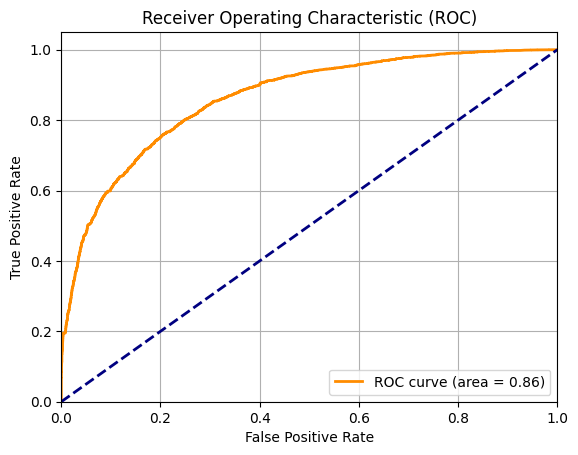

In [ ]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)  ## Complete the code to get the ROC-AUC score
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.699


### Checking tuned Logistic Regression model performance on training set

In [ ]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.80305,0.88886,0.83076,0.85883


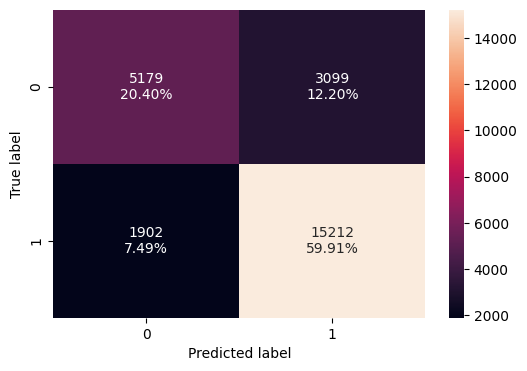

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train)

### Checking tuned Logistic Regression model performance on test set

In [ ]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.80584,0.89761,0.82681,0.86076


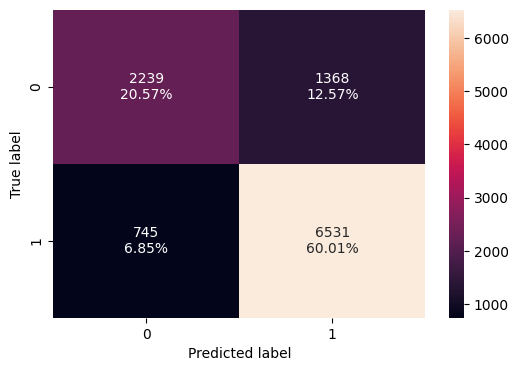

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test)

## KNN Classifier (different values of K)

### KNN Classifier Performance Improvement using different k values

In [ ]:
k_values = range(2,20)
best_k = 0
best_recall = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test1)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.802913688840022
Recall for k=3: 0.9010445299615173
Recall for k=4: 0.8545904343045629
Recall for k=5: 0.909978009895547
Recall for k=6: 0.8767179769103903
Recall for k=7: 0.9092908191313909
Recall for k=8: 0.8840021990104453
Recall for k=9: 0.9097031335898845
Recall for k=10: 0.8919736118746564
Recall for k=11: 0.9125893347993403
Recall for k=12: 0.8919736118746564
Recall for k=13: 0.9131390874106652
Recall for k=14: 0.8993952721275426
Recall for k=15: 0.9171247938427708
Recall for k=16: 0.902693787795492
Recall for k=17: 0.9175371083012644
Recall for k=18: 0.903243540406817
Recall for k=19: 0.9153380978559648

The best value of k is: 17 with a recall of: 0.9175371083012644


In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors = best_k)
knn_tuned.fit(X_train1, y_train)

KNeighborsClassifier(n_neighbors=17)

### Checking tuned KNN model performance on training set

In [ ]:
knn_tuned_perf_train = model_performance_classification(knn_tuned,X_train1,y_train)
knn_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.85944,0.91989,0.87749,0.89819


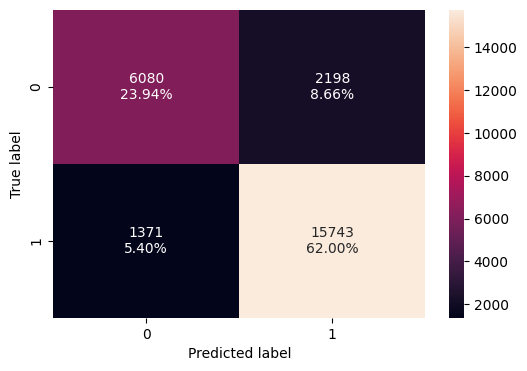

In [ ]:
plot_confusion_matrix(knn_tuned,X_train1,y_train)

### Checking tuned KNN model performance on test set

In [ ]:
knn_tuned_perf_test = model_performance_classification(knn_tuned,X_test1,y_test)
knn_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.85087,0.91754,0.86713,0.89162


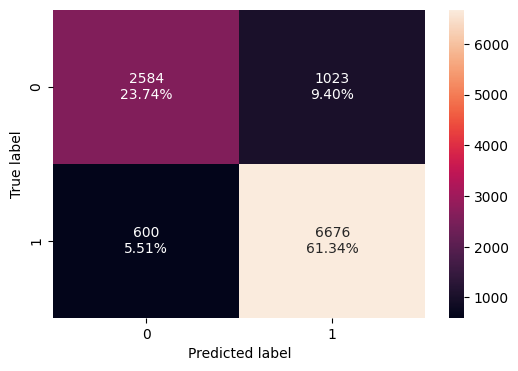

In [ ]:
plot_confusion_matrix(knn_tuned,X_test1,y_test)

## Decision Tree Classifier (pre-pruning)

### Pre-pruning the tree

In [ ]:
dt_model_tuned = DecisionTreeClassifier(random_state=42)

parameters = {
    "max_depth": np.arange(5, 13, 2),
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],
    "min_samples_split": [2, 5, 7, 10, 20, 30],
    "class_weight": ['balanced', None]
}


grid_obj = GridSearchCV(dt_model_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

dt_model_tuned = grid_obj.best_estimator_

dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=100, random_state=42)

### Checking tuned Decision Tree Classifier performance on training set

In [ ]:
decision_tree_tuned_perf_train = model_performance_classification(dt_model_tuned,X_train,y_train)
decision_tree_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.87287,0.92924,0.88744,0.90786


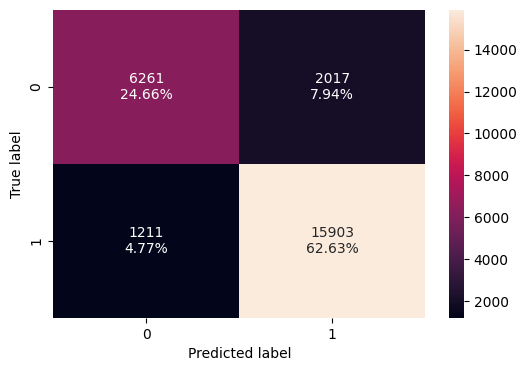

In [ ]:
plot_confusion_matrix(dt_model_tuned,X_train,y_train)

### Checking tuned Decision Tree Classifier performance on test set

In [ ]:
decision_tree_tuned_perf_test = model_performance_classification(dt_model_tuned,X_test,y_test)  ## Complete the code to get model performance on test data
decision_tree_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.87108,0.93101,0.88261,0.90616


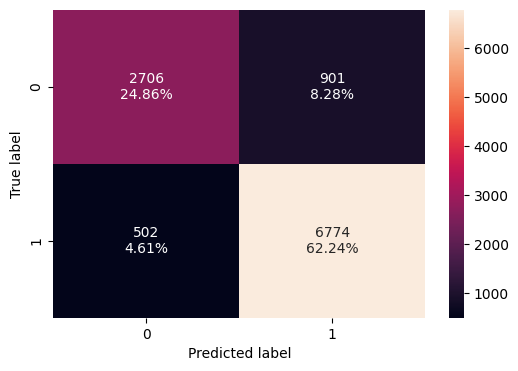

In [ ]:
plot_confusion_matrix(dt_model_tuned,X_test,y_test)  ## Complete the code to create confusion matrix for test data

### Visualizing the Decision Tree

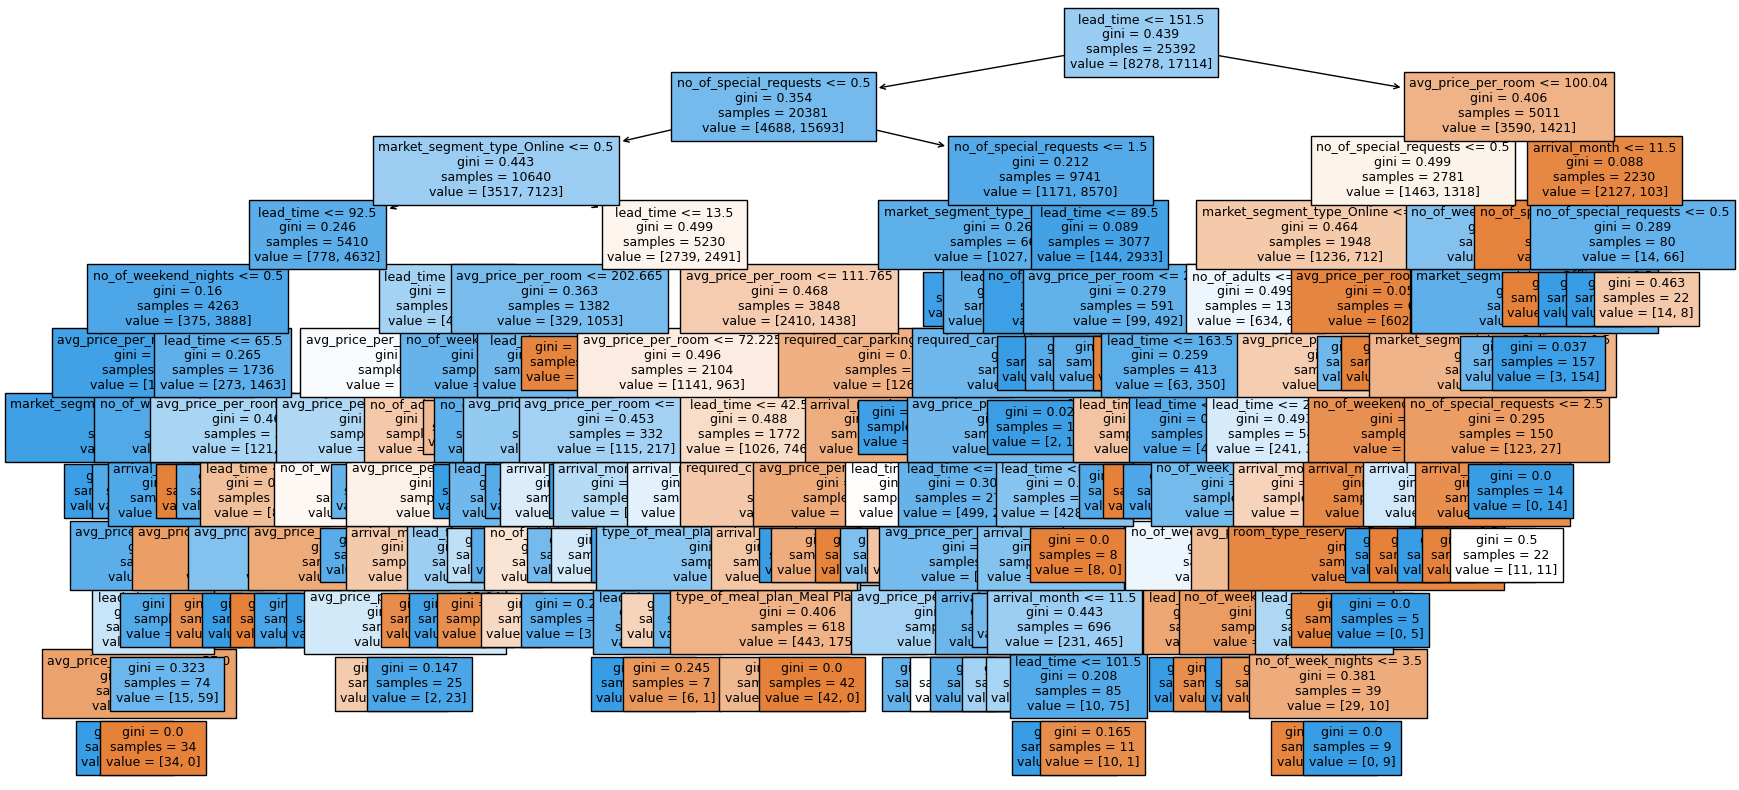

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Feature Importance

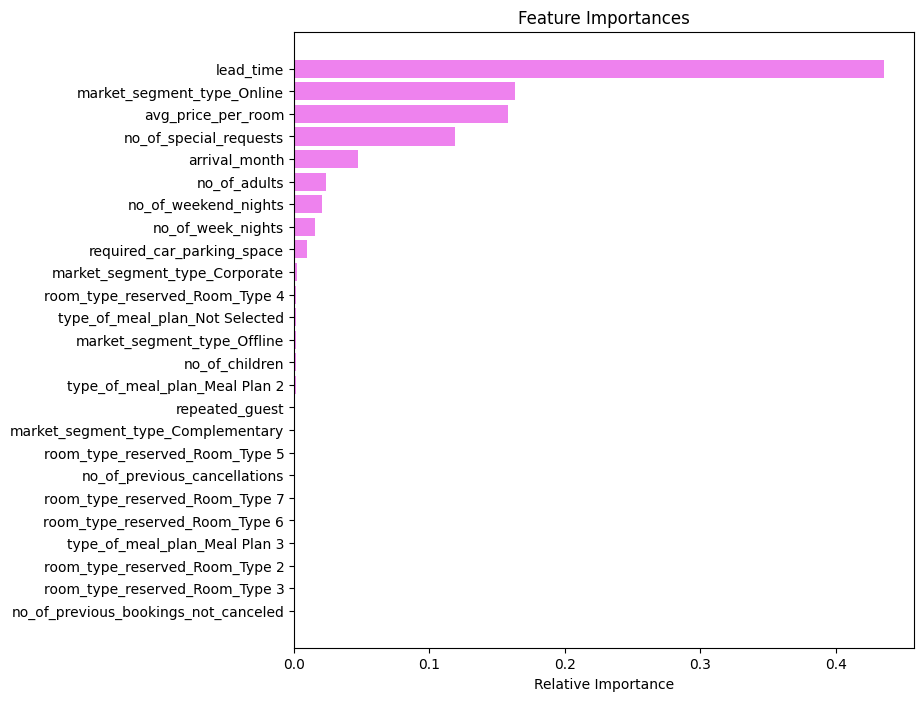

In [ ]:




feature_names = X_train.columns.tolist()
importances = dt_model_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        dt_perf_train.T,
        decision_tree_tuned_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.80289,0.80305,0.40855,0.91671,0.85944,0.99374,0.87287
Recall,0.88910,0.88886,0.14029,0.94992,0.91989,0.99509,0.92924
Precision,0.83043,0.83076,0.88729,0.92818,0.87749,0.99562,0.88744
F1,0.85876,0.85883,0.24228,0.93892,0.89819,0.99535,0.90786


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
        dt_perf_test.T,
        decision_tree_tuned_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.80289,0.80305,0.41459,0.85234,0.85087,0.86364,0.87108
Recall,0.88910,0.88886,0.14184,0.90104,0.91754,0.89321,0.93101
Precision,0.83043,0.83076,0.89042,0.88083,0.86713,0.90189,0.88261
F1,0.85876,0.85883,0.24469,0.89082,0.89162,0.89753,0.90616


###Insights
* Logistic Regression: Since tuning only slightly improves the model, logistic regression may not be the best choice. However, its high recall indicates it's good for scenarios where missing a positive instance is costly. Further improvements might not yield substantial gains.
* Naive Bayes: Naive Bayes is not suitable for this problem due to poor performance in recall and accuracy. Consider removing it from the model set.
* KNN: The base KNN model performs exceptionally well, making it a strong candidate. The tuned model's decline suggests tuning may have negatively impacted its performance. Focus on optimizing hyperparameters or feature selection for potential gains.
* Decision Tree: The base decision tree model performs the best overall. It should be considered the primary model due to its superior balance of metrics. Further tuning seems to degrade its performance, so focus on maintaining its current state.

##Model Selection - Desision Trees

Given the high accuracy, recall, precision, and F1 score, decision trees are the most promising.

# **Actionable Insights and Recommendations**


* Focus on Decision Trees: Given the high accuracy, recall, precision, and F1 score, decision trees (base version) are the most promising.
* Consider Ensemble Methods: Use ensemble methods like Random Forests or Gradient Boosting to potentially improve model performance further.
* Model Interpretability: Decision trees provide easily interpretable models, which can be an advantage in understanding the factors influencing predictions.
* Feature Engineering: Explore additional feature engineering to enhance model inputs, which might improve the performance of logistic regression or KNN models.
####Based on the Feature importance plot:
* Lead Time: This is the most important feature, suggesting that the amount of time between booking and arrival significantly influences the outcome.
* Market Segment Type (Online and Offline): These features also hold substantial importance, indicating that the channel through which the booking is made affects the results.
* Average Price Per Room: Another critical feature that impacts the model, likely reflecting the customer's budget or the quality of the room.
* Number of Special Requests: This feature's importance suggests that more personalized service requests may correlate with specific outcomes (like customer satisfaction or repeat bookings).
* Investigate creating new features that might capture the underlying processes better, such as categorizing 'lead time' into different time frames or deriving features from 'avg_price_per_room' that relate to service or amenities offered.